#   Li17 dataset 
Li17 dataset consists of 630 single cells sampled from 7 cell lines, with the expression profiling differing between patients due to intratumoral heterogeneity
## Reference:  
Li, H., Courtois, E., Sengupta, D. et al. Reference component analysis of single-cell transcriptomes elucidates cellular heterogeneity in human colorectal tumors. Nat Genet 49, 708–718 (2017). https://doi.org/10.1038/ng.3818
## GEO: 
https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE81861

In [1]:
import scanpy as sc
from KMDHierarchicalClustering.KMDAlgo import KMDClustering
from KMDHierarchicalClustering import cluster_scoring
from KMDHierarchicalClustering.preprocessing import filter_genes , obs_names_to_numbers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
import warnings
import time
import random
%matplotlib inline

In [2]:
# load dataset 
path = 'data/GSE81861_Cell_Line_COUNT.csv.gz'
adata = sc.read_csv(path).T
t = time.time()

In [3]:
# filter over and under expressed genes 
filter_genes(adata,5)

(561, 57241)
28
(561, 25083)


In [4]:
# convert annotated cells to cluster numbers
labels= adata.obs_names.to_numpy()
keys = ['A549','GM12878','H1437','HCT116','IMR90','brown','K562']
label_list, organ_idx = obs_names_to_numbers(keys,labels)

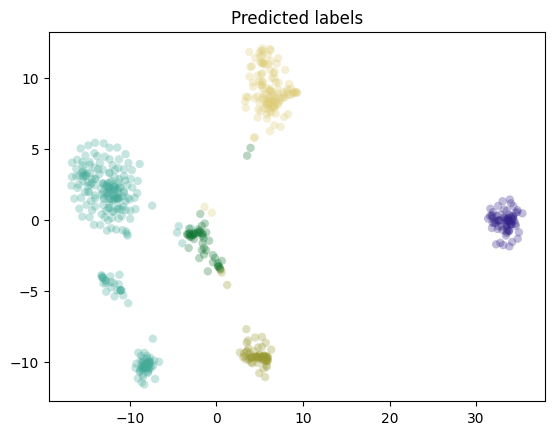

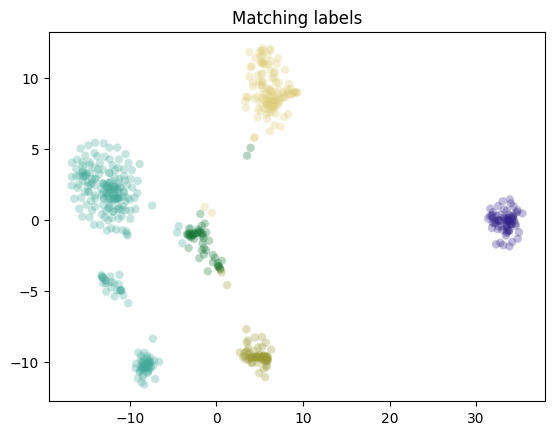

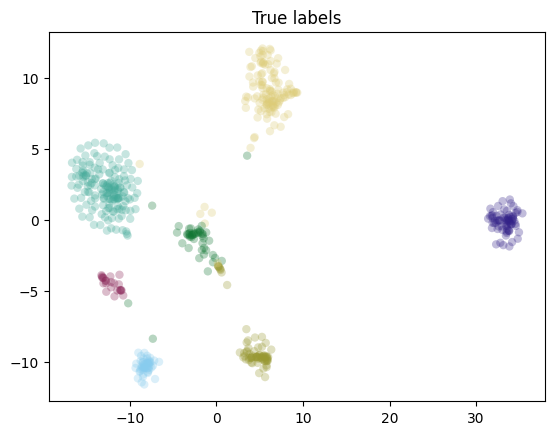

In [5]:
random.seed(1)
kmd_cluster = KMDClustering(k=77, affinity='correlation', n_clusters=5, min_cluster_size=10 , certainty=0.5)
kmd_cluster.fit(adata.X)
y_pred = kmd_cluster.predict(adata.X)
np.random.seed(1)
cluster_scoring.tsne_presentation(kmd_cluster.dists,label_list,y_pred)

In [6]:
print ('NMI')
print (normalized_mutual_info_score(label_list, y_pred))
print ('ARI')
print (adjusted_rand_score(label_list, y_pred))
print('accuracy')
print(cluster_scoring.hungarian_acc(label_list, y_pred)[0])
print('Total running time on toy dataset: '+str(time.time()-t)+ ' seconds')

NMI
0.8208380384150047
ARI
0.7033480675306865
accuracy
0.8377896613190731
Total running time on toy dataset: 21.609094858169556 seconds
